<a href="https://colab.research.google.com/github/vimalkumarmdb/Multiclass_Classification/blob/master/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing necessary libraries 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn import datasets 
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split 

# Load the iris dataset

In [0]:
iris = datasets.load_iris() 

In [0]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
data = iris['data']

In [0]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns = np.append(iris['feature_names'], ['target']))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
X,y = df.iloc[0:,0:4],df.iloc[0:,4:5]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


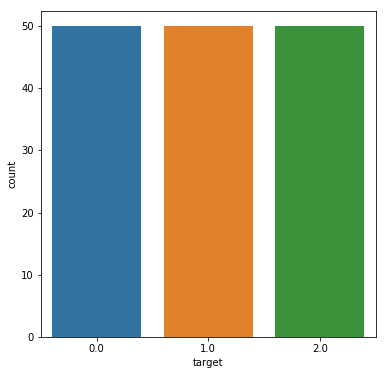

In [0]:
plt.figure(figsize=(6,6))
#plt.plot(y)
sn.countplot(df['target'], label = "Count") 
plt.xlabel("target")
plt.ylabel("count")
plt.show()
plt.show()

# Split the **dataset**



In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

# Training a KNN classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train.values, y_train.values.ravel()) 

# Accuracy 

In [0]:
accuracy = knn.score(X_test, y_test) 
print(accuracy)

0.9736842105263158


# Confusion Matrix

In [0]:
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions) 

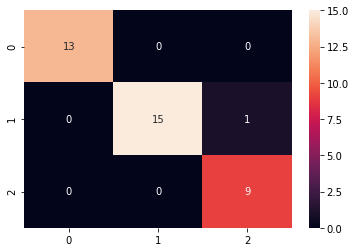

In [0]:
sn.heatmap(cm,annot = True)
plt.show()

In [0]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      0.94      0.97        16
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

